# Stock Beta and S&P Comparison 

In [10]:
import yfinance as yf
import statsmodels.api as sm
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt

Stock ticker:  AAPL
Period (years):  5


[*********************100%%**********************]  2 of 2 completed
[*********************100%%**********************]  1 of 1 completed


R-Squared: 0.65
Rf (US 10y T-Bond): 4.22%
Rm (S&P500): 14.62%
Beta: 1.20
Cost of Equity (Re): 16.71%


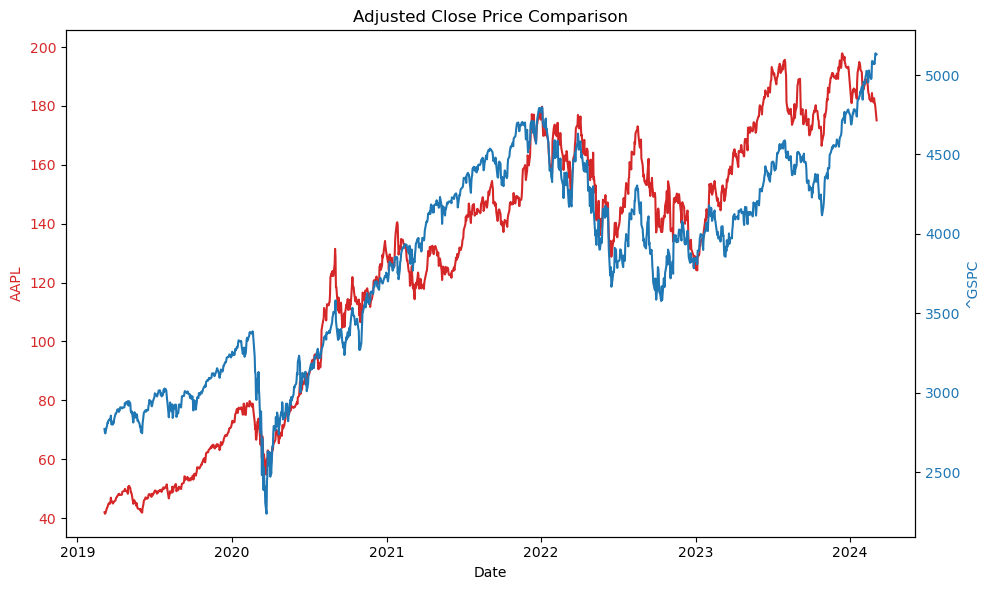

[*********************100%%**********************]  2 of 2 completed


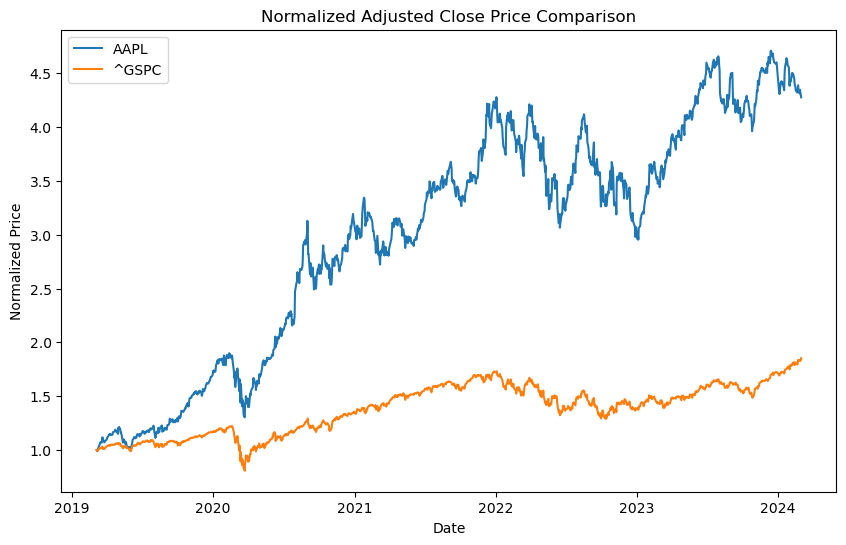

In [42]:

stock = input("Stock ticker: ")
period = int(input("Period (years): "))

ticker = [stock, "^GSPC"]
data = datetime.now()
total_days = data - timedelta(days=365 * period)

price = yf.download(ticker, total_days, data)['Adj Close']

daily_chg = price.pct_change().dropna()

X = daily_chg['^GSPC']
Y = daily_chg[ticker[0]]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

# R-Squared
#print('Beta (5Y daily): ', model.params[1])
print("R-Squared: {:.2f}".format(model.rsquared))
#print(str(model.summary()))

# Calculation Cost of Equity

## Risk Free (US 10y T-Bond)
Rf = yf.download("^TNX", data)["Close"].iloc[-1]
print("Rf (US 10y T-Bond): {:.2f}%".format(Rf))

## Risk Market (S&P500)
Rm=(daily_chg)["^GSPC"].mean()*252*100
print("Rm (S&P500): {:.2f}%".format(Rm))

## Beta 
Beta=model.params['^GSPC']
print("Beta: {:.2f}".format(Beta))

## Cost of Equity (Re)
Re=Rf+Beta*(Rm-Rf)
print("Cost of Equity (Re): {:.2f}%".format(Re))

# Plots

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Adjusted Close data for the first ticker
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel(stock, color=color)
ax1.plot(price.index, price[stock], color=color, label=stock)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis with a different scale
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('^GSPC', color=color)
ax2.plot(price.index, price['^GSPC'], color=color, label='^GSPC')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Adjusted Close Price Comparison')
fig.tight_layout()
plt.show()

# Download both historics
price2 = yf.download([stock, '^GSPC'], start=start_date, end=end_date)['Adj Close']

# Calc daily change percents
daily_chg = price2.pct_change().dropna()

# Normalize pirce to start on in the same y-axis
normalized_price = price2.div(price2.iloc[0])

# Plot normalized price
plt.figure(figsize=(10, 6))
plt.plot(normalized_price)
plt.title('Normalized Adjusted Close Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(normalized_price.columns)
plt.show()






In [17]:

# Calculation Cost of Equity

## US T-Bond download
ticker_symbol = "^TNX"
Rf = (yf.Ticker("^TNX").history(period="1d")["Close"].iloc[-1])
print("US 10y T-Bond: {:.2f}%".format(Rf))


## Re=Rf+Beta(Rm-Rf)



US 10y T-Bond: 4.22%


'\n\nimport yfinance as yf\n\n# Símbolo do T-Bond de 10 anos no Yahoo Finance\nticker_symbol = "^TNX"\n\n# Baixando os dados do T-Bond de 10 anos\ntbond_data = yf.Ticker(ticker_symbol)\n\n# Obtendo o preço atual do T-Bond de 10 anos\ncurrent_price = tbond_data.history(period="1d")["Close"].iloc[-1]\n\nprint("Preço atual do T-Bond de 10 anos:", current_price)\n\n'

In [32]:
Rf = yf.download("^TNX", data)["Close"].iloc[-1]
print(Rf)

[*********************100%%**********************]  1 of 1 completed

4.218999862670898


In [35]:
Rm=(daily_chg)["^GSPC"].mean()*252*100
print(Rm)

14.51501013745555


In [37]:
Beta=model.params['^GSPC']
print(Beta)

1.200721712359542


In [38]:
Re=Rf+Beta*(Rm-Rf)
print(Re)

16.58164295028176
